# Undersampling and Oversampling

Aplications of undersampling and oversampling in two datasets and using random forest classifier model

## 1.0 - Imports

In [14]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import (
    train_test_split, StratifiedShuffleSplit)
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    confusion_matrix, recall_score, precision_score, 
    precision_recall_curve, accuracy_score)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


def jupyter_settings():
    
    # Only to use on jupyter notebook
    from IPython.display import display, HTML
    
    # show the charts at jupyter cell
    %matplotlib inline
    
    # Matplotlib style and size patterns
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    
    # Dataframe control showded
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # Vizualization expanded to 95% of screen
    display(HTML('<style>.conteiner{width:95% !important;}</style>'))

    # Apply into seaborn
    sns.set()

    
# Function Called
jupyter_settings()

## 2.0 - Extraction

In [2]:
df_credit = pd.read_csv('../dataset/credit_data.csv')

In [77]:
df_ebay = pd.read_csv('../dataset/csv_result-ebay_confianca_completo.csv')

## 3.0 - Spliting data

In [3]:
def stratified_before_train(data, target):
    
    sss = StratifiedShuffleSplit(test_size=0.1)
    for x, y in sss.split(data, data[target]):
        df_train = data.iloc[x]
        df_test = data.iloc[y]

    return df_train, df_test

In [5]:
df_ebay_train, df_ebay_test = stratified_before_train(df_ebay, target='reputation')

## 4.0 - Cleaning data

### 4.1 - Visualizing

In [44]:
df_train.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

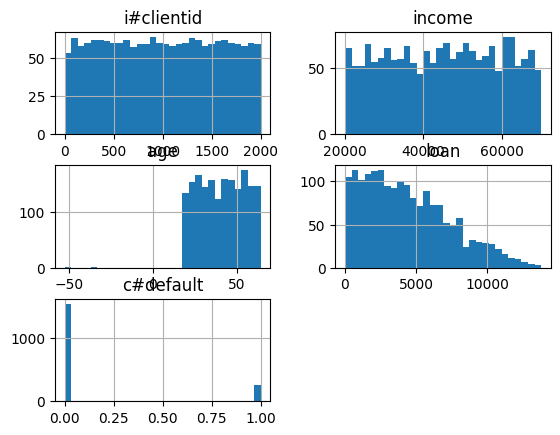

In [ ]:
df_train.hist(bins=30);

<AxesSubplot: >

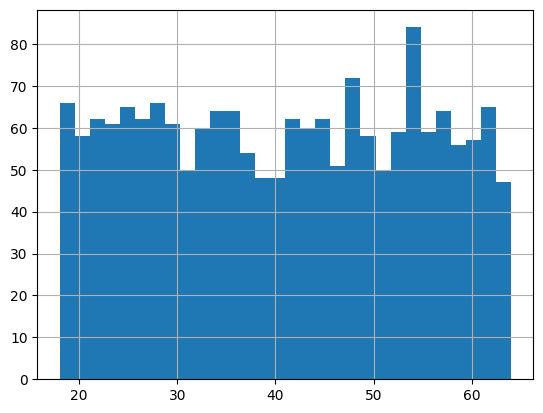

In [53]:
df_train['age'].hist(bins=30)

<AxesSubplot: >

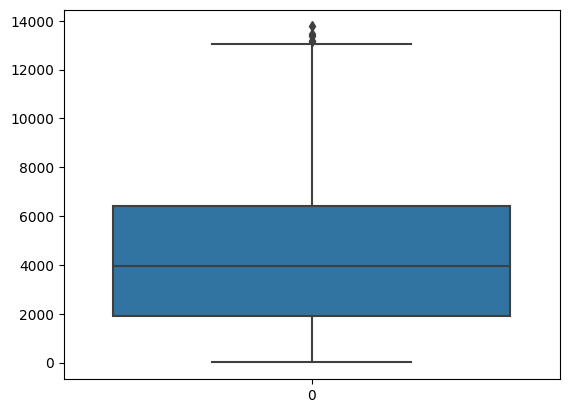

In [113]:
sns.boxplot(df_train['loan'])

In [8]:
df_ebay_train.isna().sum().sum()

0

In [34]:
df_ebay_train.select_dtypes(exclude=(['integer', 'float'])).head()

,blacklist,reputation
751,N,Bom
2284,B,Bom
3387,N,Bom
5499,N,Bom
4507,N,Ruim


### 4.2 - Cleaning

In [78]:

def cleaning_credit(data):

    data = data.dropna()
    data = data[data['age'] > 0]
    data = data.drop('i#clientid', axis=1)

    return data


def cleaning_ebay(data):
    data = data.dropna()
    data['reputation'].replace({'Bom':0, 'Ruim':1}, inplace=True)
    data['blacklist'].replace({'N':0, 'B':1}, inplace=True)

    return data

In [79]:
df_ebay_train = cleaning_ebay(df_ebay_train)
df_ebay_test = cleaning_ebay(df_ebay_test)

## 5.0 - Undersampling and Oversamplig

In [62]:
def undersampling(data, target):
    x_under = data.drop([target], axis=1).values
    y_under = data[target].values

    tl = TomekLinks(sampling_strategy='majority')
    x_under, y_under = tl.fit_resample(x_under, y_under)

    return x_under, y_under

In [63]:
def oversampling(data, target):

    x_over = data.drop(target, axis=1).values
    y_over = data[target].values

    smote = SMOTE(sampling_strategy='minority')
    x_over, y_over = smote.fit_resample(x_over, y_over)

    return x_over, y_over

## 6.0 - Modeling

### 6.1 - Train test split

In [80]:
#X, y = undersampling(df_ebay_train, target='reputation')
X, y = oversampling(df_ebay_train, target='reputation')

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

### 6.2 - Processing data

### 6.3 - Random forest

In [87]:
rf = RandomForestClassifier(n_estimators=150, random_state=1)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

<AxesSubplot: >

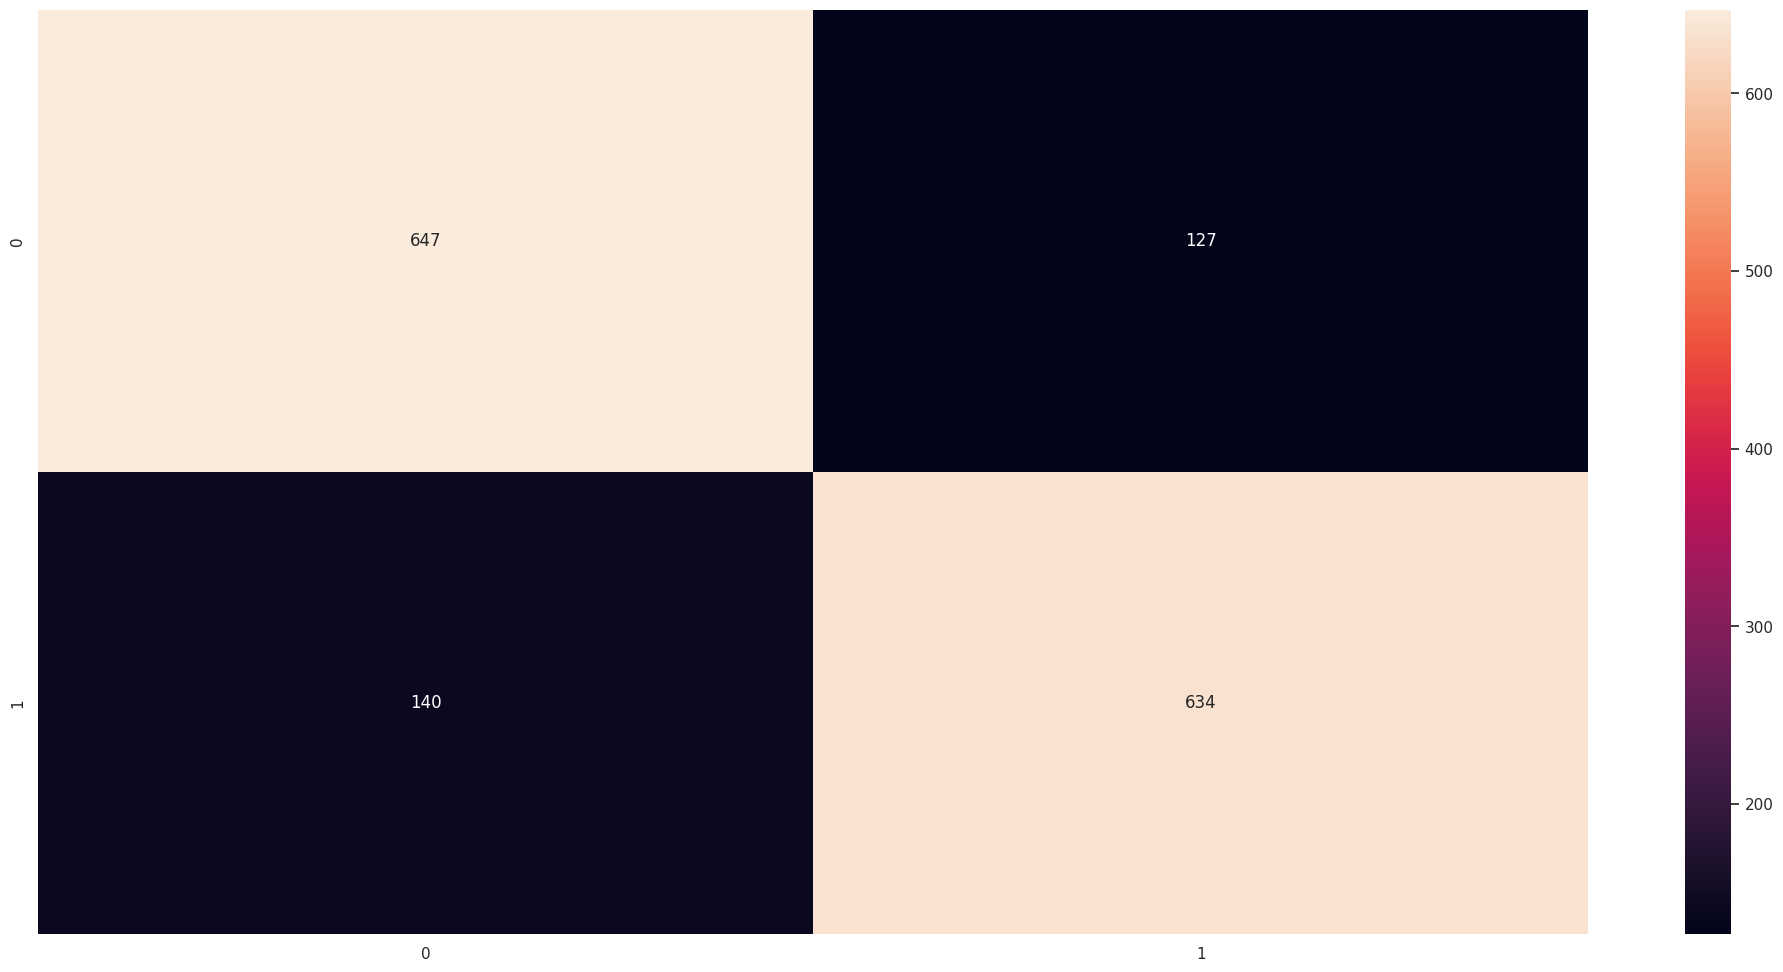

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [89]:
recall_score(y_test, y_pred)

0.8191214470284238

In [90]:
precision_score(y_test, y_pred)

0.8331143232588699

In [91]:
accuracy_score(y_test, y_pred)

0.8275193798449613